# Hopp-Woods Hydrophilicity Prediction with Linear Variation Model

## Description

A numeric value is assigned to each amino acid, using the amino acid scale outlined in the paper:

*Prediction of protein antigenic determinants from amino acid sequences*, T Hopp, K Woods, PNAS 1981

User provides protein seq in single-letter amino acid code, specifies a window size (length of the peptide), and edge weight (default $\alpha=1$). For each amino acid in the window, the program computes a weight using the linear variation model. It then applies the weight to the original score at amino acid level. The final hydrophilicity score for the peptide is calculated by dividing the sum of the corrected amino acid scores by the sum of the weights. The program repeats the process along the sequence of the protein.

## Mathematical principles

Given: 

$S=\Bigg\{\phi(n)=\frac{\sum\limits_{i=n}^{n+\Delta-1} w_{i}X_{i}}{\sum\limits_{i=n}^{n+\Delta-1} w_{i}} \Bigg| 0\le n \le N-\Delta\Bigg\}$



Rank items in set $S$ from high to low

where:

$\phi(n)$: Weighted ($w_{i}\neq1$) or non-weighted ($w_{i}=1$) hydrophilicity scores

$N$: Number of amino acids in the protein

$n$: residue index position on the protein (starting from 0)

$\Delta$: size of the peptide "window"

$X_{i}$: Hopp-Woods hydrophilicity value of amino acid $X$ 
         at index position $i$

$w_{i}$: weight used at each position. Weights are calculated using linear variation model (see below)

## Linear Variation Model for Calculation of Weights

1. When no weights are used:

   $$w_{i}=1$$

2. When using weights from linear variation model, specify edge weight $\alpha (0<\alpha\le1$)

   1) When the peptide window ($\Delta$) is an odd number:

   $w_{i}=
\begin{cases}
\alpha+\frac{1-\alpha}{\lfloor 0.5\Delta \rfloor}q & 0\le q \le \lfloor 0.5\Delta \rfloor\\
1-\frac{1-\alpha}{\lfloor 0.5\Delta \rfloor}(q-\lfloor 0.5\Delta \rfloor) & \lfloor 0.5\Delta \rfloor\ < q \le \Delta-1
\end{cases}
$

  For example, if window=7 (7-mer peptide), edge $\alpha=0.1$, then the first and the last weights will be 0.1. The weight for each amino acid in the 7-mer is:

  [0.1, 0.4, 0.7, 1.0, 0.7, 0.4, 0.1]

  2) When the peptide window ($\Delta$) is an even number:

     $w_{i}=
\begin{cases}
\alpha+\frac{1-\alpha}{0.5\Delta-1}q & 0\le q < 0.5\Delta\\
1-\frac{1-\alpha}{0.5\Delta-1}(q-0.5\Delta) & 0.5\Delta \le q \le \Delta-1
\end{cases}
$

  For example, if window=10, edge $\alpha=0.1$, then the first and the last weights will be 0.1.The weight for each amino acid in the 10-mer is:

  [0.1, 0.33, 0.55, 0.78, 1.0, 1.0, 0.78, 0.55, 0.32, 0.1]

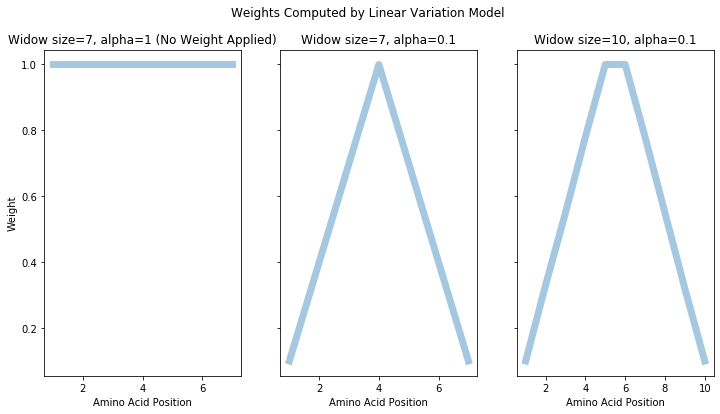

In [9]:
import matplotlib.pyplot as plt



fig, ax=plt.subplots(1, 3, sharey=True, figsize=(12, 6))

ax[0].plot([x for x in range (1, 8)],
           [1 for x in range (1, 8)], linewidth=7, alpha=0.4)
ax[0].set_xlabel("Amino Acid Position")
ax[0].set_ylabel("Weight")
ax[0].set_title("Widow size=7, alpha=1 (No Weight Applied)")

ax[1].plot([x for x in range (1, 8)],
         [0.1, 0.4, 0.7, 1.0, 0.7, 0.4, 0.1], linewidth=7, alpha=0.4)
ax[1].set_xlabel("Amino Acid Position")
ax[1].set_title("Widow size=7, alpha=0.1")

ax[2].plot([x for x in range (1, 11)] ,
         [0.1, 0.33, 0.55, 0.78, 1.0, 1.0, 0.78, 0.55, 0.32, 0.1], linewidth=7, alpha=0.4)
ax[2].set_xlabel("Amino Acid Position")
ax[2].set_title("Widow size=10, alpha=0.1")

fig.suptitle("Weights Computed by Linear Variation Model")

fig.savefig("Weights by Linear Variation Model", dpi=300)


## Code

In [2]:
import matplotlib.pyplot as plt

# Amino Acid Scale Defined by Hopp-Woods's original paper
hopp_scores={
    "R": 3,
    "D": 3,
    "E": 3,
    "K": 3,
    "S":0.3,
    "N":0.2,
    "Q":0.2,
    "G":0,
    "P":0,
    "T":-0.4,
    "A":-0.5,
    "H":-0.5,
    "C":-1,
    "M":-1.3,
    "V":-1.5,
    "I":-1.8,
    "L":-1.8,
    "Y":-2.3,
    "F":-2.5,
    "W":-3.4
}


def lm(pept_length, alpha):
    """
    Compute weights using linear variation model
    :param pept_length: int
            size of the window
    :param alpha: float between 0 (exclusive) and 1 (inclusive)
            edge weight

    :return: list
            a list of weights.
    """
    weight_lst=[]
    if pept_length%2!=0:
        for idx in range (0, pept_length):
            if idx<=pept_length//2:
                weight=alpha+(1-alpha)*idx/(pept_length//2)
                weight=round(weight, 2)
                weight_lst.append(weight)
            else:
                weight=1-(1-alpha)*(idx-pept_length//2)/(pept_length//2)
                weight=round(weight, 2)
                weight_lst.append(weight)
    else:
        for idx in range (0, pept_length):
            if idx<pept_length/2:
                weight=alpha+(1-alpha)*idx/(pept_length/2-1)
                weight=round(weight, 2)
                weight_lst.append(weight)
            else:
                weight=1-(1-alpha)*(idx-pept_length/2)/(pept_length/2-1)
                weight=round(weight, 2)
                weight_lst.append(weight)

    return weight_lst


def calc_hopp(seq, pep_length, alpha=1):
    """
    Calculate the hopp-woods score for each peptide using the linear variation model
    :param seq:str
            protein seq in one-letter code
    :param pep_length:int
            size of the window (length of the peptide)
    :param alpha: float
            edge weight, between 0 (exclusive) and 1 (inclusive)
    :return:tuple
            a tuple (averaged hydrophilicity score, peptide seq)
    """


    #Caculate un-corrected score
    aa_lst=list(seq)
    resi_hopp_lst=[hopp_scores[x] for x in aa_lst]


    #Caculate weights
    weight_lst=lm(pep_length, alpha)
    print("Weights used: ", end="")
    print(weight_lst)


    #a dictionary of {peptide_seq: averaged_hopp_score}
    pept_score_dict={}


    #Calculate corrected score
    for i in range (0, len(resi_hopp_lst)-pep_length+1):

        pept_score_lst=resi_hopp_lst[i:i+pep_length]
        weighted_pept_score_lst=[]

        for score, weight in zip(pept_score_lst, weight_lst):
            weighted_score=score*weight
            weighted_pept_score_lst.append(weighted_score)

        pept_score=sum(weighted_pept_score_lst)/(sum(weight_lst)) #sum of scores averaged over sum of weights
        pept_seq="".join(aa_lst[i:i+pep_length])
        pept_score_dict[pept_seq]=pept_score

    #key:value pair was switched in the turple to allow sorting by hopp score
    return [(v, k) for k, v in pept_score_dict.items()]

## Examples of Usage

### Example 1: Compute Hopp-Woods Scores Without Weights (window=7, $\alpha=1$)

Weights used: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
(Avg Hopp Score Sorted, Peptide)
0.41 GQCSQNE
0.34 RCSSNTP
0.27 SQNEYFD
0.27 QNEYFDS
0.26 NSVKGTN
0.17 TNSVKGT
0.17 QLRCSSN
0.16 SVKGTNA
0.09 QCSQNEY
0.09 LRCSSNT
0.06 SVTNSVK
0.01 VTNSVKG
0.00 PPLTCQR
-0.00 CQLRCSS
-0.01 QRYCNAS
-0.01 NEYFDSL
-0.04 PCQLRCS
-0.09 CSSNTPP
-0.09 AGQCSQN
-0.19 TCQRYCN
-0.20 CQRYCNA
-0.20 SSNTPPL
-0.20 NASVTNS
-0.26 RYCNASV
-0.30 EYFDSLL
-0.30 CSQNEYF
-0.30 SNTPPLT
-0.33 PLTCQRY
-0.33 DSLLHAC
-0.34 IPCQLRC
-0.34 CIPCQLR
-0.39 CNASVTN
-0.44 ASVTNSV
-0.47 LTCQRYC
-0.49 TPPLTCQ
-0.49 NTPPLTC
-0.54 FDSLLHA
-0.66 HACIPCQ
-0.74 YCNASVT
-0.80 YFDSLLH
-0.84 ACIPCQL
-0.94 LHACIPC
-1.01 SLLHACI
-1.06 LLHACIP


Text(0, 0.5, 'Hydrophilicity Score')

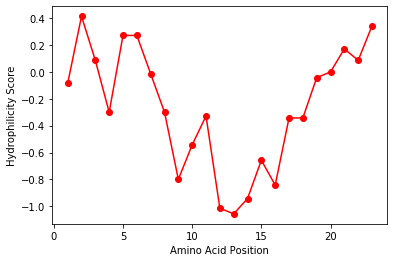

In [3]:
#provide protein seq   
protein="AGQCSQNEYFDSLLHACIPCQLRCSSNTPPLTCQRYCNASVTNSVKGTNA"

#calculate averaged Hopp score
result=calc_hopp(protein, 7)


#print averaged Hopp score result, from lowest to highest
print("(Avg Hopp Score Sorted, Peptide)")
for i in sorted(result, reverse=True):
    print ("{:.2f}".format(i[0]), "{}".format(i[1]))

# Plot desired range to show on the x axis.
# Recommend to change starting position to 1 instead of 0
x=range(1, 24) 

#range of averaged hopp scores to show on y axis. 
y=[x[0] for x in result[0:23]]

#plot chart
plt.plot(x, y, "r-", x, y, "ro")
plt.xlabel("Amino Acid Position")
plt.ylabel("Hydrophilicity Score")

### Example 2: Computed Hopp-Woods Scores Weighted by Linear Variation Model (window=7, $\alpha=0.1$)

Same protein and window

Weights used: [0.1, 0.4, 0.7, 1.0, 0.7, 0.4, 0.1]
(Avg Hopp Score Sorted, Peptide)
0.57 NSVKGTN
0.38 CSQNEYF
0.38 SVKGTNA
0.34 CQLRCSS
0.34 QCSQNEY
0.28 SQNEYFD
0.26 LRCSSNT
0.24 TNSVKGT
0.22 QLRCSSN
0.21 TCQRYCN
0.11 RCSSNTP
0.08 VTNSVKG
0.07 LTCQRYC
0.06 GQCSQNE
0.04 CSSNTPP
-0.02 EYFDSLL
-0.09 SSNTPPL
-0.10 PCQLRCS
-0.18 AGQCSQN
-0.18 QNEYFDS
-0.22 SVTNSVK
-0.25 IPCQLRC
-0.25 NEYFDSL
-0.25 YFDSLLH
-0.26 PLTCQRY
-0.26 CQRYCNA
-0.27 SNTPPLT
-0.37 CNASVTN
-0.37 ASVTNSV
-0.42 QRYCNAS
-0.42 YCNASVT
-0.44 RYCNASV
-0.48 NASVTNS
-0.49 NTPPLTC
-0.58 PPLTCQR
-0.62 CIPCQLR
-0.63 FDSLLHA
-0.74 TPPLTCQ
-0.74 ACIPCQL
-0.91 LHACIPC
-0.92 HACIPCQ
-0.93 LLHACIP
-0.97 DSLLHAC
-0.99 SLLHACI


Text(0, 0.5, 'Hydrophilicity Score')

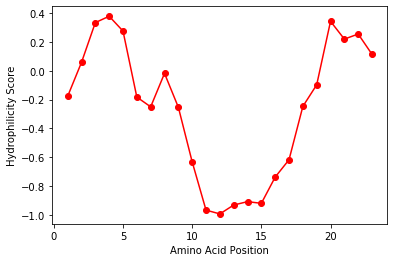

In [4]:
result_corr=calc_hopp(protein, 7, alpha=0.1)

print("(Avg Hopp Score Sorted, Peptide)")
for i in sorted(result_corr, reverse=True):
    print ("{:.2f}".format(i[0]), "{}".format(i[1]))

y2=[x[0] for x in result_corr[0:23]]
plt.plot(x, y2, "r-", x, y2, "ro")
plt.xlabel("Amino Acid Position")
plt.ylabel("Hydrophilicity Score")


### Example 3: Computed Hopp-Woods Scores Weighted by Linear Variation Model (window=10, $\alpha=0.1$)

Same protein

Weights used: [0.1, 0.33, 0.55, 0.78, 1.0, 1.0, 0.78, 0.55, 0.32, 0.1]
(Avg Hopp Score Sorted, Peptide)
0.25 VTNSVKGTNA
0.19 QCSQNEYFDS
0.15 QLRCSSNTPP
0.15 CQLRCSSNTP
0.15 PCQLRCSSNT
0.13 GQCSQNEYFD
0.11 AGQCSQNEYF
0.11 CSQNEYFDSL
0.09 SVTNSVKGTN
0.09 LRCSSNTPPL
0.02 IPCQLRCSSN
-0.03 ASVTNSVKGT
-0.08 RCSSNTPPLT
-0.09 SQNEYFDSLL
-0.13 PLTCQRYCNA
-0.15 LTCQRYCNAS
-0.17 QNEYFDSLLH
-0.18 NASVTNSVKG
-0.21 CIPCQLRCSS
-0.24 CSSNTPPLTC
-0.24 PPLTCQRYCN
-0.25 TCQRYCNASV
-0.27 NEYFDSLLHA
-0.31 CQRYCNASVT
-0.33 CNASVTNSVK
-0.34 TPPLTCQRYC
-0.36 SSNTPPLTCQ
-0.37 QRYCNASVTN
-0.40 ACIPCQLRCS
-0.41 NTPPLTCQRY
-0.42 YCNASVTNSV
-0.43 RYCNASVTNS
-0.44 SNTPPLTCQR
-0.53 EYFDSLLHAC
-0.57 HACIPCQLRC
-0.71 YFDSLLHACI
-0.75 LHACIPCQLR
-0.78 FDSLLHACIP
-0.88 DSLLHACIPC
-0.89 LLHACIPCQL
-0.93 SLLHACIPCQ


Text(0, 0.5, 'Hydrophilicity Score')

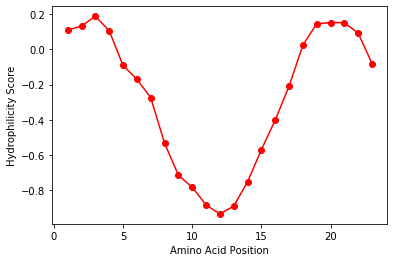

In [5]:
result_corr_2=calc_hopp(protein, 10, alpha=0.1)

print("(Avg Hopp Score Sorted, Peptide)")
for i in sorted(result_corr_2, reverse=True):
    print ("{:.2f}".format(i[0]), "{}".format(i[1]))

y3=[x[0] for x in result_corr_2[0:23]]
plt.plot(x, y3, "r-", x, y3, "ro")
plt.xlabel("Amino Acid Position")
plt.ylabel("Hydrophilicity Score")

## Validating against Expasy Result

### Validate Example 1 (no weights, window=7)

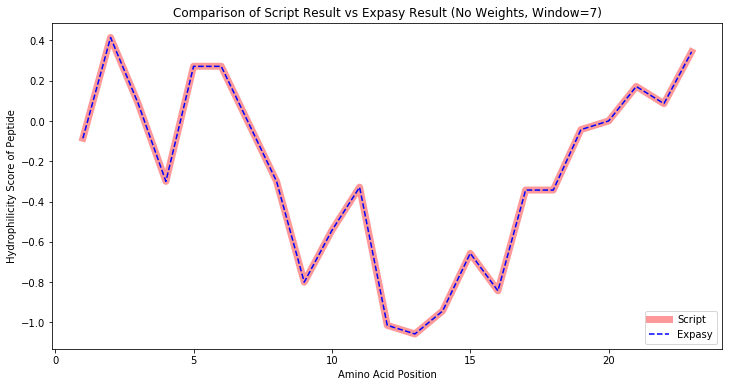

In [6]:
#list only the first 23 in the order of the sequence
y_expassy=[-0.086, 0.414, 0.086, -0.300, 0.271, 0.271, -0.014, -0.300,
             -0.800, -0.543, -0.329, -1.014,  -1.057 , -0.943, -0.657,
              -0.843, -0.343, -0.343, -0.043, -0.000, 0.171, 0.086,0.343,
]

plt.figure(figsize=(12,6))
plt.plot(x, y, "r-", linewidth=7, alpha=0.4)
plt.plot(x, y_expassy, "b--")
plt.title("Comparison of Script Result vs Expasy Result (No Weights, Window=7)")
plt.xlabel("Amino Acid Position")
plt.ylabel("Hydrophilicity Score of Peptide")
plt.legend(["Script", "Expasy"], loc="lower right")


#plt.savefig("expassy_validate_noweights.png", dpi=300)


### Validate Example 2 (Weighted $\alpha=0.1$, window=7)

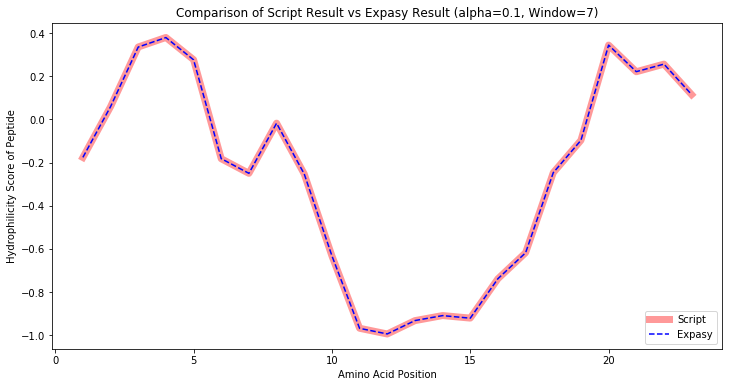

In [7]:
y2_expassy=[-0.176,0.059, 0.335, 0.379, 0.276,-0.182,-0.250,-0.018,
-0.253, -0.632, -0.968 , -0.994, -0.932, -0.909, -0.921, -0.738,
-0.618, -0.247, -0.097, 0.344, 0.221, 0.256 , 0.115
]

plt.figure(figsize=(12,6))
plt.plot(x, y2, "r-", linewidth=7, alpha=0.4)
plt.plot(x, y2_expassy, "b--")
plt.title("Comparison of Script Result vs Expasy Result (alpha=0.1, Window=7)")
plt.xlabel("Amino Acid Position")
plt.ylabel("Hydrophilicity Score of Peptide")
plt.legend(["Script", "Expasy"], loc="lower right")

#plt.savefig("expassy_validate_weighted.png", dpi=300)

